In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the data

In [2]:
x_train = np.genfromtxt("data/x_train.csv", delimiter=",", skip_header=1)
features = np.genfromtxt("data/x_train.csv", delimiter=",", dtype=str, max_rows=1)
y_train = np.genfromtxt("data/y_train.csv", delimiter=",", skip_header=1)
y_features = np.genfromtxt("data/y_train.csv", delimiter=",", dtype=str, max_rows=1)

# Feature Selection and Engineering

In [49]:
# all features become categorical for homogeneity
# we only keep possibly relevant features
# we will also do a dimensionality reduction because a lot of features are highly correlated

mapping_dict = {
    "GENHLTH": lambda value: value if value <= 5 else -1,
    "PHYSHLTH": lambda value: 0 if value == 0 else 10 if 1 <= value <= 10 else 20 if 11 <= value <= 20 else 30 if 21 <= value <= 30 else -1,
    "MENTHLTH": lambda value: 0 if value == 0 else 10 if 1 <= value <= 10 else 20 if 11 <= value <= 20 else 30 if 21 <= value <= 30 else -1,
    "POORHLTH": lambda value: 0 if value == 0 else 10 if 1 <= value <= 10 else 20 if 11 <= value <= 20 else 30 if 21 <= value <= 30 else -1,
    "HLTHPLN1": lambda value: 1 if value == 1 else 0,
    "MEDCOST": lambda value: 1 if value == 1 else 0,
    "CHECKUP1": lambda value: value if value <= 4 or value==8 else -1,
    "BPHIGH4": lambda value: 1 if value == 1 else 0,
    "BPMEDS": lambda value: 1 if value == 1 else 0,
    "BLOODCHO": lambda value: 1 if value == 1 else 0,
    "CHOLCHK": lambda value: value if value <= 4 else -1,
    # "CVDINFR4": lambda value: 1 if value == 1 else 0,
    # "CVDCRHD4": lambda value: 1 if value == 1 else 0,
    "TOLDHI2": lambda value: 1 if value == 1 else 0,
    "CVDSTRK3": lambda value: 1 if value == 1 else 0,
    "ASTHMA3": lambda value: 1 if value == 1 else 0,
    "ASTHNOW": lambda value: 1 if value == 1 else 0,
    "CHCSCNCR": lambda value: 1 if value == 1 else 0,
    "CHCOCNCR": lambda value: 1 if value == 1 else 0,
    "CHCCOPD1": lambda value: 1 if value == 1 else 0,
    "HAVARTH3": lambda value: 1 if value == 1 else 0,
    "ADDEPEV2": lambda value: 1 if value == 1 else 0,
    "CHCKIDNY": lambda value: 1 if value == 1 else 0,
    "DIABETE3": lambda value: 1 if value == 1 else 0,
    "SEX": lambda value: 1 if value == 1 else 0,
    "MARITAL": lambda value: value,
    "EDUCA": lambda value: value,
    "VETERAN3": lambda value: 1 if value == 1 else 0,
    "INCOME2": lambda value: value if value <= 8 else -1,
    "INTERNET": lambda value: 1 if value == 1 else 0,
    "WTKG3": lambda value: 77 if value <= 77 else 132 if value <= 132 else 187 if value <= 187 else 242 if value <= 242 else 295 if value <= 295 else -1,
    "QLACTLM2": lambda value: 1 if value == 1 else 0,
    "USEEQUIP": lambda value: 1 if value == 1 else 0,
    "BLIND": lambda value: 1 if value == 1 else 0,
    "DECIDE": lambda value: 1 if value == 1 else 0,
    "DIFFWALK": lambda value: 1 if value == 1 else 0,
    "DIFFDRES": lambda value: 1 if value == 1 else 0,
    "DIFFALON": lambda value: 1 if value == 1 else 0,
    "SMOKE100": lambda value: 1 if value == 1 else 0,
    "SMOKDAY2": lambda value: value if value <= 3 else -1,
    "LASTSMK2": lambda value: value if value <= 8 else -1,
    "USENOW3": lambda value: value if value <= 3 else -1,
    "AVEDRNK2": lambda value: str(value//20) if value <=76 else -1,
    "DRNK3GE5": lambda value: str(value//20) if value <=76 else -1,
    "EXERANY2": lambda value: 1 if value == 1 else 0,
    # "EXERHMM1": lambda value: str(value//200) if value <= 959 and value not in [777,999] else -1,
    "LMTJOIN3": lambda value: value if value <= 2 else -1,
    "FLUSHOT6": lambda value: 1 if value == 1 else 0,
    "PDIABTST": lambda value: 1 if value == 1 else 0,
    "PREDIAB1": lambda value: 1 if value == 1 else 0,
    "INSULIN": lambda value: 1 if value == 1 else 0,
    "CIMEMLOS": lambda value: 1 if value == 1 else 0,
    "_RFHLTH": lambda value: value if value <= 2 else -1,
    "_HCVU651": lambda value: value if value <= 2 else -1,
    "_RFHYPE5": lambda value: value if value <= 2 else -1,
    "_CHOLCHK": lambda value: value if value <= 3 else -1,
    "_RFCHOL": lambda value: value if value <= 2 else -1,
    # "_MICHD": lambda value: value if value <= 2 else -1,
    "_LTASTH1": lambda value: value if value <= 2 else -1,
    "_CASTHM1": lambda value: value if value <= 2 else -1,
    "_DRDXAR1": lambda value: 1 if value == 1 else 0,
    "_AGEG5YR": lambda value: value,
    "_AGE_G": lambda value: value,
    "HTM4": lambda value: 1.50 if value <= 1.50 else 1.60 if value <= 1.60 else 1.75 if value <= 1.75 else 1.90 if value <= 1.90 else 2.00 if value > 1.90 else -1,
    "_RFBMI5": lambda value: 1 if value == 2 else 0,
    "_EDUCAG": lambda value: value if value <= 4 else -1,
    "_SMOKER3": lambda value: value if value <= 3 else -1,
    "_RFBING5": lambda value: 1 if value == 2 else 0,
    "_BMI5CAT": lambda value: value if value <= 4 else -1,
    "_RFDRHV5": lambda value: 1 if value == 2 else 0,
    "FTJUDA1_": lambda value: 0 if value == 0 else 10 if value <= 10 else 30 if value <= 30 else 70 if value <= 70 else 99 if value <=99 else -1,
    "MAXVO2_": lambda value: value//10 if value <= 50 else -1,
    "ACTIN11_": lambda value: value if value <= 2 else -1,
    "ACTIN21_": lambda value: value if value <= 2 else -1,
    "_PACAT1": lambda value: value if value <= 9 else -1,
    "_PA150R2": lambda value: value if value <= 9 else -1,
    "_PA300R2": lambda value: value if value <= 9 else -1,
    "_PASTRNG":  lambda value: value if value <= 9 else -1,
    "_PASTAE1": lambda value: value if value <= 9 else -1,
    "_LMTACT1": lambda value: value if value <= 9 else -1,
    "_LMTWRK1": lambda value: value if value <= 3 else -1,
    "_LMTSCL1": lambda value: value if value <= 4 else -1,
    "_INCOMG": lambda value: value if value <= 5 else -1
}


In [50]:
# for each feature in mapping_dict, check the ratio of nan values in x_train and keep only the ones with less than 10%
# The features with a high nan value ratio won't be too useful and are in anyway correlated with other features

nan_ratios = {}
for feature in mapping_dict:
    nan_ratios[feature] = np.sum(np.isnan(x_train[:, features == feature])) / len(x_train)

selected_features = [feature for feature in nan_ratios if nan_ratios[feature] < 0.1]

print(f"Selected {len(selected_features)} features over {len(mapping_dict)}")

Selected 62 features over 79


In [51]:
# apply the mapping to the selected features and keep only those in the training

print(x_train.shape)

x_train_filtered = np.zeros((x_train.shape[0], len(selected_features)))
for feature in selected_features:
    feature_values = x_train[:, features == feature].flatten()
    if feature_values.size > 0:
        x_train_filtered[:, selected_features.index(feature)] = np.array([mapping_dict[feature](value) for value in feature_values])

print(x_train_filtered.shape)

(328135, 322)
(328135, 62)


# Visualizing the links between the features and the target

## plot proportion of y=1 for each value of a feature

In [48]:
# feature = "PHYSHLTH"
# print(x_train[:, features == feature].flatten())
# print("Max value:", np.nanmax(x_train[:, features == feature][x_train[:, features == feature] != 99.0]))
# print("Min value:", np.min(x_train[:, features == feature][~np.isnan(x_train[:, features == feature])]))

[ 1. 88. 77. ... 88. 88.  7.]
Max value: 88.0
Min value: 1.0


6


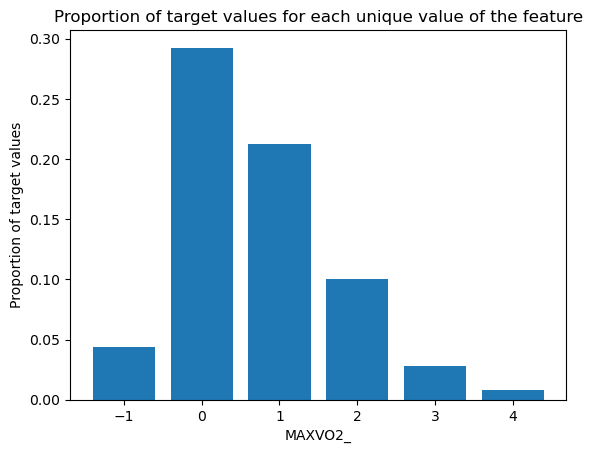

In [52]:
feature = "MAXVO2_" # categorical feature
feature_index = selected_features.index(feature)
feature_values = x_train_filtered[:, feature_index]
unique_values = np.unique(feature_values)
print(len(unique_values))
target_values = y_train[:, -1] # values in {1, -1}

# plot a bar plot (one bar for each unique value of the feature) showing the proportion of target values for each unique value of the feature
proportions = []
for value in unique_values:
    target_values_for_value = target_values[feature_values == value]
    proportions.append(np.sum(target_values_for_value == 1) / len(target_values_for_value))

plt.bar(unique_values, proportions)
plt.xlabel(feature)
plt.ylabel('Proportion of target values')
plt.title('Proportion of target values for each unique value of the feature')
plt.show()

## Normalized Mutual Information

In [53]:
print(selected_features)

['GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'HLTHPLN1', 'MEDCOST', 'CHECKUP1', 'BPHIGH4', 'BLOODCHO', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3', 'SEX', 'MARITAL', 'EDUCA', 'VETERAN3', 'INCOME2', 'INTERNET', 'WTKG3', 'QLACTLM2', 'USEEQUIP', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'USENOW3', 'EXERANY2', 'FLUSHOT6', '_RFHLTH', '_HCVU651', '_RFHYPE5', '_CHOLCHK', '_LTASTH1', '_CASTHM1', '_DRDXAR1', '_AGEG5YR', '_AGE_G', 'HTM4', '_RFBMI5', '_EDUCAG', '_SMOKER3', '_RFBING5', '_BMI5CAT', '_RFDRHV5', 'FTJUDA1_', 'MAXVO2_', '_PACAT1', '_PA150R2', '_PA300R2', '_PASTRNG', '_PASTAE1', '_LMTACT1', '_LMTWRK1', '_LMTSCL1', '_INCOMG']


In [66]:
# We will calculate the entropy H(F|Y) = P(Y=1)H(F|Y=1) + P(Y=-1)H(F|Y=-1) for each feature F

# Function to calculate entropy
def calculate_entropy(probabilities):
    # Calculate entropy: H(X) = -sum(p(x) * log2(p(x)))
    # check that the sum of probabilities is 1
    assert np.isclose(np.sum(probabilities), 1), f"Probabilities do not sum to 1: {np.sum(probabilities)}"
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

entropies = []
entropies_normalized = []
joint_entropies = []
joint_entropies_normalized = []
mutual_informations = []
NMI = []

# Filter the rows based on target values
Y1 = x_train_filtered[y_train[:,1] == 1]
Y_minus1 = x_train_filtered[y_train[:,1] == -1]

# Total counts for probabilities
count_Y1 = len(Y1)
count_Y_minus1 = len(Y_minus1)
total_count = count_Y1 + count_Y_minus1

# Calculate probabilities of Y
p_Y1 = count_Y1 / total_count
p_Y_minus1 = count_Y_minus1 / total_count

# entropy of Y:
entropy_Y = calculate_entropy([p_Y1, p_Y_minus1])

# Iterate over the indices of the features
for feature in selected_features:
    feature_index = selected_features.index(feature)
    # Get the feature values for the entire dataset (to find all unique values)
    all_feature_values = x_train_filtered[:, feature_index]
    unique_values_all, counts_all = np.unique(all_feature_values, return_counts=True)
    
    # Get the feature values for the filtered rows where Y=1
    feature_values_Y1 = Y1[:, feature_index]
    non_nan_values_Y1 = feature_values_Y1[~np.isnan(feature_values_Y1)]
    
    # Get the counts for each unique value in filtered rows where Y=1
    unique_values_filtered_Y1, counts_filtered_Y1 = np.unique(non_nan_values_Y1, return_counts=True)
    
    # Create a dictionary for filtered counts where Y=1
    filtered_count_dict_Y1 = dict(zip(unique_values_filtered_Y1, counts_filtered_Y1))

    # Initialize the probabilities list for Y=1
    probabilities_Y1 = []
    
    # Calculate probabilities for Y=1
    for value in unique_values_all:
        count = filtered_count_dict_Y1.get(value, 0)  # Default to 0 if not found
        probabilities_Y1.append(count / np.sum(counts_filtered_Y1) if np.sum(counts_filtered_Y1) > 0 else 0)  # Probabilities

    # Compute the entropy for Y=1
    entropy_Y1 = calculate_entropy(probabilities_Y1)
    
    # Get the feature values for the filtered rows where Y=-1
    feature_values_Y_minus1 = Y_minus1[:, feature_index]
    non_nan_values_Y_minus1 = feature_values_Y_minus1[~np.isnan(feature_values_Y_minus1)]
    
    # Get the counts for each unique value in filtered rows where Y=-1
    unique_values_filtered_Y_minus1, counts_filtered_Y_minus1 = np.unique(non_nan_values_Y_minus1, return_counts=True)
    
    # Create a dictionary for filtered counts where Y=-1
    filtered_count_dict_Y_minus1 = dict(zip(unique_values_filtered_Y_minus1, counts_filtered_Y_minus1))

    # Initialize the probabilities list for Y=-1
    probabilities_Y_minus1 = []
    
    # Calculate probabilities for Y=-1
    for value in unique_values_all:
        count = filtered_count_dict_Y_minus1.get(value, 0)  # Default to 0 if not found
        probabilities_Y_minus1.append(count / np.sum(counts_filtered_Y_minus1) if np.sum(counts_filtered_Y_minus1) > 0 else 0)  # Probabilities

    # Compute the entropy for Y=-1
    entropy_Y_minus1 = calculate_entropy(probabilities_Y_minus1)
    
    # Calculate the joint entropy H(f|Y)
    joint_entropy = (p_Y1 * entropy_Y1) + (p_Y_minus1 * entropy_Y_minus1)
    
    # Normalize entropies
    entropy_normalized_Y1 = entropy_Y1 / np.log2(len(unique_values_all)) if len(unique_values_all) > 1 else 0
    entropy_normalized_Y_minus1 = entropy_Y_minus1 / np.log2(len(unique_values_all)) if len(unique_values_all) > 1 else 0
    
    # Append results
    entropies.append((entropy_Y1, entropy_Y_minus1))
    entropies_normalized.append((entropy_normalized_Y1, entropy_normalized_Y_minus1))
    joint_entropies.append(joint_entropy)
    joint_entropies_normalized.append(joint_entropy / np.log2(len(unique_values_all)) if len(unique_values_all) > 1 else 0)
    # mutual_information = H(F) - H(F|Y)
    # with joint_entropy = H(F|Y)
    entropy_feature = calculate_entropy(counts_all / np.sum(counts_all))
    mutual_information = (entropy_feature - joint_entropy) / np.log2(len(unique_values_all))
    mutual_informations.append(mutual_information)
    # Normalized mutual information
    NMI.append(2 * mutual_information / (entropy_Y + entropy_feature))
    


In [67]:
# sum of the mutual information for each feature
print(np.sum(NMI))

0.7973488736551978


[('GENHLTH', 0.01321113640460762), ('PHYSHLTH', 0.009465773719164312), ('MENTHLTH', 0.001487180916286728), ('HLTHPLN1', 0.0032673803251792558), ('MEDCOST', 0.0005795253487274069), ('CHECKUP1', 0.0024800541453470137), ('BPHIGH4', 0.0478826544186464), ('BLOODCHO', 0.014636901441908828), ('CVDSTRK3', 0.0559481971302017), ('ASTHMA3', 0.0032167539973076615), ('CHCSCNCR', 0.009650875436771853), ('CHCOCNCR', 0.009686492535194857), ('CHCCOPD1', 0.042339928072805406), ('HAVARTH3', 0.02796113677382566), ('ADDEPEV2', 0.005429524363422098), ('CHCKIDNY', 0.026891298955736033), ('DIABETE3', 0.036962355781966265), ('SEX', 0.005068909697124422), ('MARITAL', 0.0036540298199253386), ('EDUCA', 0.0015638338373940759), ('VETERAN3', 0.01731348553254677), ('INCOME2', 0.0017217992677516978), ('INTERNET', 0.021965453781663914), ('WTKG3', 0.0009731529124204024), ('QLACTLM2', 0.03454218574194), ('USEEQUIP', 0.041964879616894844), ('BLIND', 0.016412816795208174), ('DECIDE', 0.012812447226052454), ('DIFFWALK', 0.0

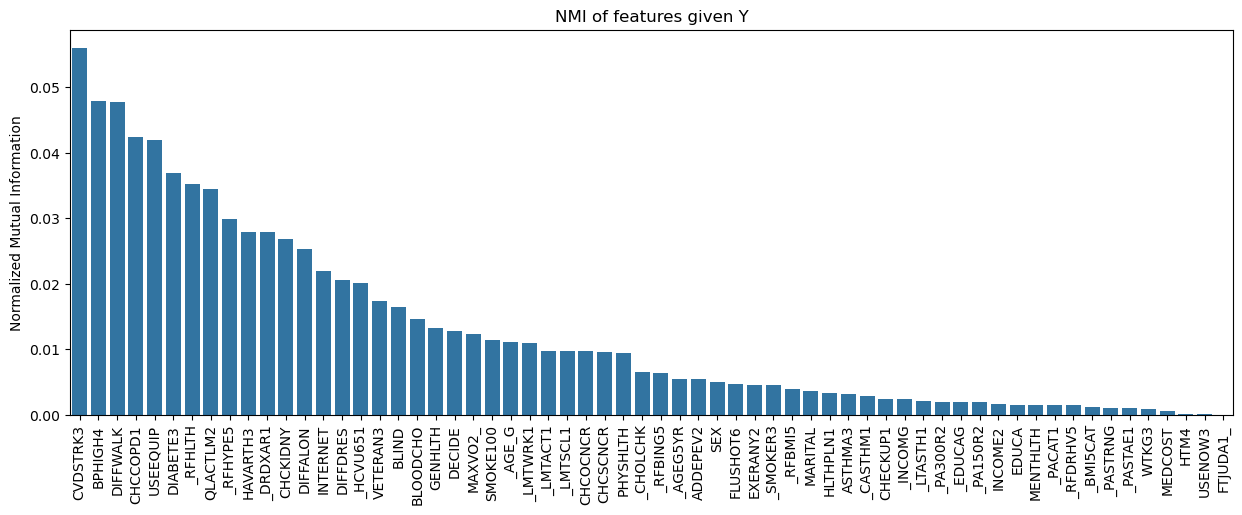

In [70]:
# print the entropies with the corresponding feature
print(list(zip(selected_features, NMI)))

# plot the NMI in seaborn in a bar plot (sorted by entropy)
# Sort the features by entropy
sorted_indices = np.argsort(NMI)[::-1]
sorted_features = [selected_features[i] for i in sorted_indices]
sorted_entropies = [NMI[i] for i in sorted_indices]

# Plot the entropies
plt.figure(figsize=(15, 5))
sns.barplot(x=sorted_features, y=sorted_entropies)
plt.xticks(rotation=90)
plt.ylabel('Normalized Mutual Information')
plt.title('NMI of features given Y')
plt.show()


We observe from this that the most dependent features to the target are :
- CVDSTRK3 : "(Ever told) you had a stroke"
- BPHIGH4 : "Ever told you had high blood pressure"
- DIFFWALK : "Do you have serious difficulty walking or climbing stairs?"
- CHCCOPD1 : "(Ever told) you have Chronic Obstructive Pulmonary Disease or COPD, emphysema or chronic bronchitis?"
- USEEQUIP : "Do you now have any health problem that requires you to use special equipment, such as a cane, a wheelchair, a
special bed, or a special telephone? "

# Dimensionality Reduction

In [75]:
# Keep only the features with a NMI above a certain threshold
threshold = 0.02
selected_features_2 = [selected_features[i] for i in range(len(selected_features)) if NMI[i] > threshold]
x_train_filtered_2 = x_train_filtered[:, [selected_features.index(feature) for feature in selected_features_2]]
print(f"Selected {len(selected_features_2)} features over {len(selected_features)}")
print(x_train_filtered_2.shape)

Selected 16 features over 62
(328135, 16)


# Classification

## Fixing the class imbalance

In [89]:
from tqdm import tqdm
import numpy as np

def fix_class_imbalance(X, y, target_value=1):
    """
    Fix class imbalance by oversampling the minority class or undersampling the majority class.
    
    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n_samples, n_features)
    y (numpy.ndarray): Target vector of shape (n_samples,), containing values -1 and 1
    target_value (int): Class value to balance to (default is 1)
    
    Returns:
    X_balanced (numpy.ndarray): Feature matrix with balanced classes
    y_balanced (numpy.ndarray): Balanced target vector
    """
    # Separate samples by class
    class_1_indices = np.where(y == target_value)[0]
    class_minus_1_indices = np.where(y != target_value)[0]
    
    # Find class counts
    class_1_count = len(class_1_indices)
    class_minus_1_count = len(class_minus_1_indices)
    
    if class_1_count == class_minus_1_count:
        # If classes are already balanced, return the original data
        return X, y
    
    elif class_1_count < class_minus_1_count:
        # If class 1 is the minority, oversample class 1
        oversample_size = class_minus_1_count - class_1_count
        oversampled_indices = np.random.choice(class_1_indices, oversample_size, replace=True)
        new_indices = np.concatenate([np.arange(len(y)), oversampled_indices])
    else:
        # If class -1 is the minority, oversample class -1
        oversample_size = class_1_count - class_minus_1_count
        oversampled_indices = np.random.choice(class_minus_1_indices, oversample_size, replace=True)
        new_indices = np.concatenate([np.arange(len(y)), oversampled_indices])
    
    # Create the balanced dataset
    X_balanced = X[new_indices]
    y_balanced = y[new_indices]
    
    return X_balanced, y_balanced


# Usage:
# x_train_fixed, y_train_fixed = fix_class_imbalance(x_train_filtered_2, y_train[:, -1], target_value=1)
# print(x_train_fixed.shape)


(598320, 16)


## One Hot Encoding

In [90]:
# create a numpy array x_train_filtered_2_OHE with one hot encoding
x_train_filtered_2_OHE = np.zeros((x_train_filtered_2.shape[0], 0))
for feature in selected_features_2:
    feature_values = x_train_filtered[:, selected_features.index(feature)]
    unique_values = np.unique(feature_values)
    for value in unique_values:
        x_train_filtered_2_OHE = np.hstack((x_train_filtered_2_OHE, np.array([feature_values == value]).T))

print(x_train_filtered_2_OHE.shape)
print(x_train_filtered_2_OHE)

(328135, 35)
[[1. 0. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 [1. 0. 1. ... 0. 0. 1.]
 ...
 [1. 0. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 1. 0. 1.]]


## data splitting

In [91]:
# data splitting
def split_data(x, y, ratio=0.8):
    indices = np.random.permutation(x.shape[0])
    train_indices = indices[:int(ratio * x.shape[0])]
    test_indices = indices[int(ratio * x.shape[0]):]
    return x[train_indices], y[train_indices], x[test_indices], y[test_indices]

x_train_filtered_2_OHE_train, y_train_train, x_train_filtered_2_OHE_test, y_train_test = split_data(x_train_filtered_2_OHE, y_train[:,1])

# fix class imbalance
x_train_filtered_2_OHE_train_fixed, y_train_train_fixed = fix_class_imbalance(x_train_filtered_2_OHE_train, y_train_train, target_value=1)
print(x_train_filtered_2_OHE_train_fixed.shape)


(478750, 35)


## Logistic Regression

In [92]:
from implementations import *

# use reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma)

# Initialize the weights
initial_w = np.zeros(x_train_filtered_2_OHE_train_fixed.shape[1])
max_iters = 500
gamma = 0.02
lambda_ = 0.1

# Run the logistic regression
w, loss = reg_logistic_regression(y_train_train_fixed, x_train_filtered_2_OHE_train_fixed, lambda_, initial_w, max_iters, gamma)


Regularized Logistic Regression(0/499): loss=0.693147180559945, w0=-0.008172616187989557, w1=-0.0018273838120104438
Regularized Logistic Regression(1/499): loss=0.6233499442408817, w0=-0.016038625327193697, w1=-0.00338084598879092
Regularized Logistic Regression(2/499): loss=0.5602185031390925, w0=-0.02361556525897034, w1=-0.004678312174277347
Regularized Logistic Regression(3/499): loss=0.5030169534559602, w0=-0.030921774296196247, w1=-0.005737641080215092
Regularized Logistic Regression(4/499): loss=0.4510645642472584, w0=-0.037975715984453526, w1=-0.006576211089031876
Regularized Logistic Regression(5/499): loss=0.40374348043635333, w0=-0.044795474863463684, w1=-0.007210635839822684
Regularized Logistic Regression(6/499): loss=0.36050087879843545, w0=-0.05139840581061494, w1=-0.007656586611266657
Regularized Logistic Regression(7/499): loss=0.3208473311216361, w0=-0.05780091068419075, w1=-0.007928697826455333
Regularized Logistic Regression(8/499): loss=0.2843528263448771, w0=-0.064

In [93]:
def predict_logistic_regression(y, x, w):
    return np.sign(sigmoid(x @ w) - 0.5)

# calculate the accuracy, precision, recall and F1 score
def accuracy_precision_recall_f1(y_true, y_pred):
    tp = np.sum(y_true[y_pred == 1] == 1)
    fp = np.sum(y_true[y_pred == 1] == -1)
    tn = np.sum(y_true[y_pred == -1] == -1)
    fn = np.sum(y_true[y_pred == -1] == 1)
    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
    return accuracy, precision, recall, f1

# Predict the values
y_pred_train = predict_logistic_regression(y_train_train, x_train_filtered_2_OHE_train, w)
y_pred_test = predict_logistic_regression(y_train_test, x_train_filtered_2_OHE_test, w)

# Calculate the metrics
accuracy_train, precision_train, recall_train, f1_train = accuracy_precision_recall_f1(y_train_train, y_pred_train)
accuracy_test, precision_test, recall_test, f1_test = accuracy_precision_recall_f1(y_train_test, y_pred_test)

print(f"Train accuracy: {accuracy_train}, precision: {precision_train}, recall: {recall_train}, F1: {f1_train}")
print(f"Test accuracy: {accuracy_test}, precision: {precision_test}, recall: {recall_test}, F1: {f1_test}")

Train accuracy: 0.9088789674981333, precision: 0.44181576223569424, recall: 0.12916612631305927, F1: 0.1998929622691999
Test accuracy: 0.9074161549362305, precision: 0.4318975552968568, recall: 0.12701129750085588, F1: 0.19629629629629633
